# Brownian Motion Simulation

### SDE

$$ dX_{t}=\mu dt+\sigma dW_{t}$$

Here $W_{t}$ is the Wiener process, $ \mu $ is the drift and $\sigma$ is the diffusion
coefficient.

### Simulation

$$ \Delta X=\mu\Delta t+\sigma\Delta W $$

In [1]:
import numpy as np

In [2]:
T = 4.0

In [3]:
times = linspace(0.0, T, num=41) 

In [4]:
Nt = times.size
Np = 256 # number of paths

Diffusion parameters: $ \mu $ , $ \sigma $ , $ \Delta t $

In [5]:
mu = 0.2;
sigma = 2.0
Dt = 0.1
stdev = sqrt(Dt)*sigma

$$ \Delta X=\mathit{\mathcal{N}}(\mu\Delta t,\sigma^{2}\Delta t) $$

In [6]:
X = np.zeros((Nt,Np))
for it in range(1, Nt):
    X[it,:] = X[it-1,:] + random.normal(mu*Dt, stdev, Np)

In [7]:
def plot_paths(X, step = 1):
    """ 
        plot all paths (step=1) or every step-th path
    """
    Np = X.shape[1]
    for ip in range(Np):
        if ip % step == 0:
            plot(times, X[:,ip])
    xlabel('time, t')
    ylabel('distance, x ')

Only every eighth path is plotted

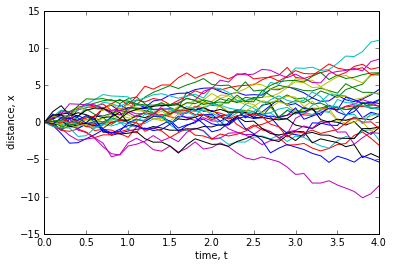

In [8]:
plot_paths(X, 8)

In [9]:
def final_stat(X):
    """ mean avariance and std at the end of simulation """
    #m = mean(X[Nt-1,:])
    m = mean(X[-1,:])
    v = var(X[-1,:])
    s = std(X[-1,:])
    print 'mean =', m, '  var =', v, '  std = ', s

In [10]:
final_stat(X)

mean = 0.874958300557   var = 17.9124318433   std =  4.23230809881


Limiting values: mean = $ \mu T $ = 0.8,   var = $ \sigma^{2} T $ = 16,   std = $ \sqrt{var} $ = 4

$$ \Delta X=\mu\Delta t+\sigma\sqrt{\Delta t}\,\mathcal{N}(0,1) $$

In [11]:
X = np.zeros((Nt,Np))
for it in range(1, Nt):
    X[it,:] = X[it-1,:] + mu*Dt + stdev*random.normal(0.0, 1.0, Np)

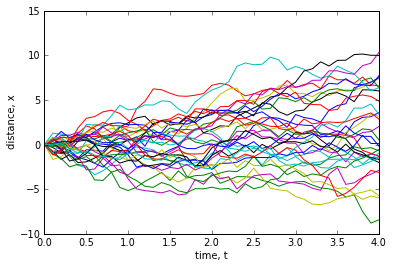

In [12]:
plot_paths(X, 8)

In [13]:
final_stat(X)

mean = 1.21175680006   var = 17.0508974439   std =  4.12927323435


### Random walk simulation

In [14]:
def toss(p = 0.5):
  """ Simulate a coin toss - returns 1 with probabiliyt p and -1 otherwise """
  x = random.random()
  if x < p:
    return 1.0
  else:
    return -1.0

In [15]:
def one_step(h, n):
    """ one step random walk """
    x = 0.0
    for i in range(n):
        x += h*toss()
    return x

In [16]:
def update_all(Dt, n):
    tau = Dt/n
    h = sqrt(tau)
    for it in range(1, Nt):
        for ip in range(Np):
            X[it,ip] =  X[it-1,ip]  + mu*Dt + sigma*one_step(h, n)

In [17]:
X = np.zeros((Nt,Np))
n = 50
update_all(Dt, n)

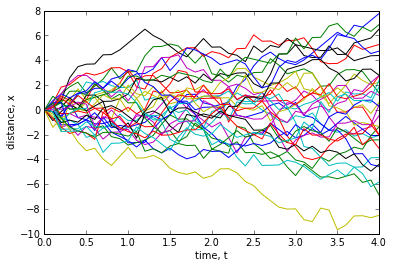

In [18]:
plot_paths(X, 8)

In [19]:
final_stat(X)

mean = 0.521889045298   var = 13.1974042969   std =  3.63282318547
